<a href="https://colab.research.google.com/github/kobloutsos/MarketingMix_DeepLearning-21/blob/main/MarketingMix_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
from google.colab import files
uploaded = files.upload()

Saving transaction_data.csv to transaction_data.csv


In [38]:
data_trs = pd.read_csv('/content/transaction_data.csv')
data_hh = pd.read_csv('/content/hh_demographic.csv')
data_product = pd.read_csv('/content/product.csv')

In [39]:
data_hh.head(5)
data_trs.head(5)
data_product.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [49]:
data_all_1=pd.merge(data_trs, data_hh, left_on="household_key", right_on="household_key").drop('household_key', axis=1)
data_all_2=pd.merge(data_all_1, data_product, left_on="PRODUCT_ID", right_on="PRODUCT_ID").drop('PRODUCT_ID', axis=1)
data_all_2.head(5)

,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,26984896261,1,1,2.19,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
1,27950201718,81,1,1.67,333,-0.52,1242,12,0.0,0.0,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
2,34186568032,485,1,1.67,433,-0.62,2123,70,0.0,0.0,35-44,U,50-74K,Unknown,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
3,28023861855,87,3,5.00,346,-1.57,1844,13,0.0,0.0,35-44,A,100-124K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
4,27924836708,79,2,3.33,372,-1.05,1326,12,0.0,0.0,35-44,A,50-74K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ


In [193]:
data_all_F = pd.concat([data_all_2,pd.get_dummies(data_all_2['INCOME_DESC'], prefix='INCOME_DESC',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_2['AGE_DESC'], prefix='AGE_DESC',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_2['MARITAL_STATUS_CODE'], prefix='MARITAL_STATUS_CODE',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_2['HOMEOWNER_DESC'], prefix='HOMEOWNER_DESC',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_2['HH_COMP_DESC'], prefix='HH_COMP_DESC',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F = pd.concat([data_all_F,pd.get_dummies(data_all_2['HH_COMP_DESC'], prefix='HH_COMP_DESC',drop_first=True)],axis=1);data_all_F.head(5)
data_all_F["Price"] = data_all_F["SALES_VALUE"] / data_all_F["QUANTITY"];data_all_F.head(5)



,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,Price
0,26984896261,1,1,2.19,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.190000
1,27950201718,81,1,1.67,333,-0.52,1242,12,0.0,0.0,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1.670000
2,34186568032,485,1,1.67,433,-0.62,2123,70,0.0,0.0,35-44,U,50-74K,Unknown,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.670000
3,28023861855,87,3,5.00,346,-1.57,1844,13,0.0,0.0,35-44,A,100-124K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.666667
4,27924836708,79,2,3.33,372,-1.05,1326,12,0.0,0.0,35-44,A,50-74K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.665000


In [194]:
data_all_F_custom = data_all_F[data_all_F.SUB_COMMODITY_DESC == "GRANOLA BARS"]
data_all_F_custom.head(5)

,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,Price
0,26984896261,1,1,2.19,31742,0.00,1520,1,0.0,0.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.190000
1,27950201718,81,1,1.67,333,-0.52,1242,12,0.0,0.0,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1.670000
2,34186568032,485,1,1.67,433,-0.62,2123,70,0.0,0.0,35-44,U,50-74K,Unknown,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.670000
3,28023861855,87,3,5.00,346,-1.57,1844,13,0.0,0.0,35-44,A,100-124K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.666667
4,27924836708,79,2,3.33,372,-1.05,1326,12,0.0,0.0,35-44,A,50-74K,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.665000


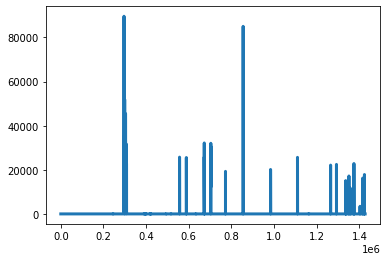

In [138]:
data_all_F_custom['QUANTITY'].plot(linewidth=3)

In [260]:
 X_all = data_all_F_custom.drop(['STORE_ID','BASKET_ID','DAY','QUANTITY','SALES_VALUE','TRANS_TIME','WEEK_NO','AGE_DESC',	'MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC','MANUFACTURER','DEPARTMENT','BRAND','COMMODITY_DESC','SUB_COMMODITY_DESC','CURR_SIZE_OF_PRODUCT'], axis=1)

In [245]:
X_all = data_all_F_custom[['Price']]

Y_all = data_all_F_custom[['QUANTITY']]
#Y_all.head(5)

In [261]:
X_all.shape


(3076, 36)

In [262]:
X_all_DF = pd.DataFrame(X_all)

In [263]:
X_all_DF

,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,Price
0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.190000
1,-0.52,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1.670000
2,-0.62,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.670000
3,-1.57,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.666667
4,-1.05,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.665000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417022,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2.990000
1418803,-0.50,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.990000
1420068,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.890000
1420069,-0.89,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.000000


In [264]:
X=X_all_DF.values

In [265]:
Y_all = data_all_F_custom[['QUANTITY']].values

In [266]:
Y_all.shape


(3076, 1)

In [267]:
Y_all

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y_all = scaler.fit_transform(Y_all)

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y_all, test_size =0.2)

In [271]:
X_train.shape;
X_test.shape

(616, 36)

In [306]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape = (36,)))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 5)                 185       
_________________________________________________________________
dense_112 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 6         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [307]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [308]:
epochs_hist=model.fit(X_train,Y_train, epochs=5, batch_size=5)

Epoch 1/5
492/492 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/5
492/492 [==============================] - 1s 1ms/step - loss: nan
Epoch 3/5
492/492 [==============================] - 1s 1ms/step - loss: nan
Epoch 4/5
492/492 [==============================] - 1s 1ms/step - loss: nan
Epoch 5/5
492/492 [==============================] - 1s 1ms/step - loss: nan
